In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Linear Regression

To start off, we need to generate training samples.   
We do this by creating a line (y = mx + c) that is meant to be the baseline answer.

In [2]:
m = 2
c = 3
f = lambda x: m * x + c

We generate the samples as follows

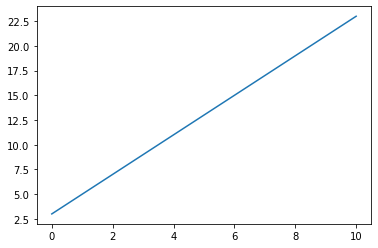

In [3]:
xs = torch.linspace(0, 10, 50)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

Let's add some noise

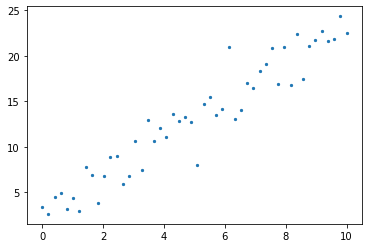

In [4]:
ys = ys + torch.randn(len(xs)) * 2
plt.scatter(xs, ys, s=5)
plt.show()

Tada, so we have created some training samples

In [5]:
print(xs)
print(ys)

tensor([ 0.0000,  0.2041,  0.4082,  0.6122,  0.8163,  1.0204,  1.2245,  1.4286,
         1.6327,  1.8367,  2.0408,  2.2449,  2.4490,  2.6531,  2.8571,  3.0612,
         3.2653,  3.4694,  3.6735,  3.8776,  4.0816,  4.2857,  4.4898,  4.6939,
         4.8980,  5.1020,  5.3061,  5.5102,  5.7143,  5.9184,  6.1224,  6.3265,
         6.5306,  6.7347,  6.9388,  7.1429,  7.3469,  7.5510,  7.7551,  7.9592,
         8.1633,  8.3673,  8.5714,  8.7755,  8.9796,  9.1837,  9.3878,  9.5918,
         9.7959, 10.0000])
tensor([ 3.3754,  2.6472,  4.5535,  4.8965,  3.2205,  4.3675,  2.9640,  7.8016,
         6.8755,  3.8404,  6.7602,  8.9355,  8.9876,  5.8778,  6.7788, 10.6809,
         7.4791, 12.9989, 10.6055, 12.0892, 11.0410, 13.6536, 12.8717, 13.2446,
        12.7016,  8.0024, 14.7363, 15.4909, 13.4697, 14.2050, 21.0009, 13.0900,
        14.0989, 17.0081, 16.5176, 18.3245, 19.1362, 20.8796, 16.9535, 20.9567,
        16.8533, 22.3502, 17.4680, 21.1073, 21.6966, 22.7233, 21.6115, 21.8605,
        24.35

Its time to create our own function approximator to learn it.  
We will need to initialise our weight, w and bias, c.  
We need to set requires_grad=True, to allow PyTorch to track its operations.

In [6]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


Thus our hypothesis shall be

In [7]:
h = lambda x: w * x + b

And our cost function, or basically our performance measure is

In [8]:
j = lambda: ((h(xs) - ys) ** 2).mean()

This will show us our current loss, by initialising our weight and bias to zero

In [9]:
cost = j()
print(cost)

tensor(212.5422, grad_fn=<MeanBackward0>)


Now let autograd do its magic: finding the deriative of the cost and allow us to tune w and b

In [10]:
cost = j()
cost.backward()
print(w.grad)
print(b.grad)

tensor([-166.9917])
tensor([-26.2256])


Let's set out some hyperparameters,  
In fact the only one is learning rate.

In [11]:
a = 1e-3

In [14]:
%%time
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
for i in range(1000):
    cost = j()
    cost.backward()
    with torch.no_grad(): # To prevent tracking any operations
        w -= a * w.grad
        b -= a * b.grad
        w.grad.zero_() # Reset Gradient
        b.grad.zero_() # We don't want it to accumulate
        # Plot
#         clear_output(wait=True)
#         plt.scatter(xs, ys, s=5)
#         plt.plot(xs, h(xs))
#         plt.show()
#         print(i, cost.item(), w.item(), b.item())
print(w.item(), b.item())
print(m, c)

2.2353153228759766 1.6534656286239624
2 3
Wall time: 939 ms


In [15]:
%%time
w = torch.rand(1, requires_grad=False)
b = torch.rand(1, requires_grad=False)
for i in range(1000):
    error = h(xs) - ys
    cost = (error ** 2).mean()
    w -= (error * xs).mean() * a * 2
    b -= (error * 1).mean() * a * 2
    # Plot
#     clear_output(wait=True)
#     plt.scatter(xs, ys, s=5)
#     plt.plot(xs, h(xs))
#     plt.show()
#     print(i, cost.item(), w.item(), b.item())
print(w.item(), b.item())
print(m, c)

2.222437620162964 1.7395440340042114
2 3
Wall time: 553 ms
